# Use of smartphones and People with Computer Anxiety

## Dataset

**Description:** Dataset containing metrics and scale results from field study performed at @CRECI. The study aims at supporting personalization features for people with Computer Anxiety (PwCA). The analyses use data from interaction logs to identify levels of Computer Anxiety (CA)

**Goal:** Identify attributes to support regression for CARS values and classification using groups of PwCA.

In [6]:
import pandas as pd
import numpy as np
import imblearn

from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from ipyfilechooser import FileChooser
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

## Loading Excel File

In [7]:
fc = FileChooser('C:/Users/thiag/Documents/Doutorado/CHI 2021') ; # https://pypi.org/project/ipyfilechooser/
display(fc)
# /Users/vagsant/Documents/supervision/current/thiago santos/data/elementos-analise-video-graficos2.xlsx

FileChooser(path='C:/Users/thiag/Documents/Doutorado/CHI 2021', filename='', title='HTML(value='', layout=Layo…

In [9]:
print(fc.selected)

C:/Users/thiag/Documents/Doutorado/CHI 2021\elementos-analise-video-graficos2.xlsx


In [10]:
xlsx = pd.ExcelFile( fc.selected ) ;
df = pd.read_excel( xlsx, 'Todos os dados' ) ;

In [11]:
df

,P,Age,Education Levels (years),Minimental,GDS,CSE,STAI-T,STAI-E,SUS,Minimental - Result,...,Gaze Total Time (sec),Gaze Velocity (px/s),Mean Pupil Size (norm),Pupil standard deviation (norm),High Three Sigma,Low three sigma,High Outliers,Low Outliers,CARS,CLASS
0,38,81,8,30,2,64,33,22,50.0,Y,...,299.265,79.940,0.650,0.117,1.000,0.300,0,2,48,High
1,12,73,0,23,0,61,27,20,30.0,Y,...,317.084,102.574,0.307,0.096,0.596,0.019,5,1,51,High
2,14,70,5,29,2,76,23,23,42.5,Y,...,494.571,45.781,0.263,0.098,0.558,-0.032,8,0,28,No
3,32,76,6,28,0,51,29,21,50.0,Y,...,342.616,41.449,0.329,0.114,0.672,-0.014,7,0,47,High
4,37,72,15,29,1,81,31,27,72.5,Y,...,379.266,333.728,0.298,0.046,0.435,0.160,11,46,45,Low
5,31,73,8,29,1,38,36,29,67.5,Y,...,434.426,242.659,0.492,0.110,0.821,0.163,111,20,44,Low
6,36,77,15,30,1,54,26,21,87.5,Y,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,42,Low
7,27,81,10,29,3,59,32,23,20.0,Y,...,521.057,266.127,0.207,0.048,0.350,0.064,14,3,40,Low
8,28,68,15,30,2,31,42,26,30.0,Y,...,445.316,9.528,0.306,0.179,0.843,-0.232,2,0,57,High
9,22,63,15,29,0,51,21,25,65.0,Y,...,532.814,195.453,0.298,0.069,0.504,0.093,34,6,23,No


## Comparing Age vs. CARS

In [12]:
len( df )

31

In [13]:
df_high = df[df['CARS'] > 47]
df_low = df[df['CARS'] < 34]
df_moderate = df[df['CARS'] >= 34]
df_moderate = df_moderate[df_moderate['CARS'] <= 47]

In [14]:
len( df_low )

7

In [15]:
len( df_moderate )

14

In [16]:
len( df_high )

10

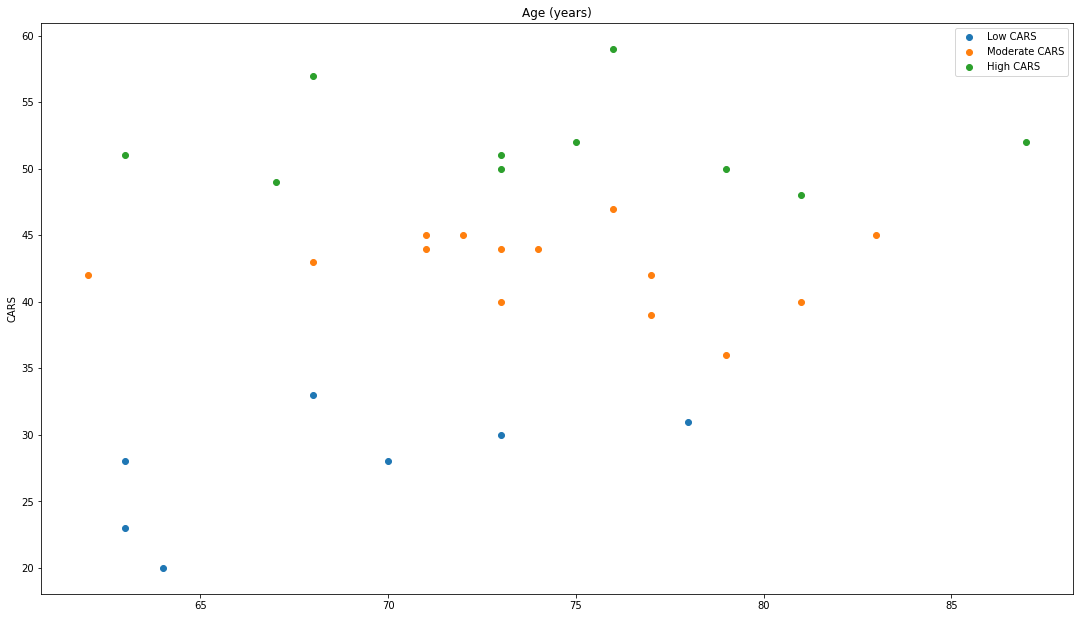

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.scatter(df_low['Age'], df_low['CARS'],  label='Low CARS', norm=False)
plt.scatter(df_moderate['Age'], df_moderate['CARS'],  label='Moderate CARS', norm=True)
plt.scatter(df_high['Age'], df_high['CARS'],  label='High CARS', norm=True)
ax.legend()
plt.ylabel('CARS')
plt.title('Age (years)')
plt.show()

In [18]:
swtest, p_age = shapiro( df[ 'Age' ] )
swtest, p_cars = shapiro( df[ 'CARS' ] )

print( 'Shapiro-Wilk (Age) p-value: {:.5f}'.format( p_age ) ) 
print( 'Shapiro-Wilk (CARS) p-value: {:.5f}'.format( p_cars ) ) 

Shapiro-Wilk (Age) p-value: 0.63876
Shapiro-Wilk (CARS) p-value: 0.21348


In [19]:
k = 'Age'
utest, p_lm = mannwhitneyu( df_low[ k ], df_moderate[ k ] )
print(utest)
utest, p_lh = mannwhitneyu( df_low[ k ], df_high[ k ] )
print(utest)
utest, p_mh = mannwhitneyu( df_moderate[ k ], df_high[ k ] )
print(utest)

print( 'Low CARS vs. Moderate CARS p-value {:.5f}'.format( p_lm ) ) 
print( 'Low CARS vs. High CARS p-value {:.5f}'.format( p_lh ) ) 
print( 'Moderate CARS vs. High CARS p-value {:.5f}'.format( p_mh ) ) 


23.5
18.5
70.0
Low CARS vs. Moderate CARS p-value 0.03074
Low CARS vs. High CARS p-value 0.05819
Moderate CARS vs. High CARS p-value 0.48828


No handles with labels found to put in legend.


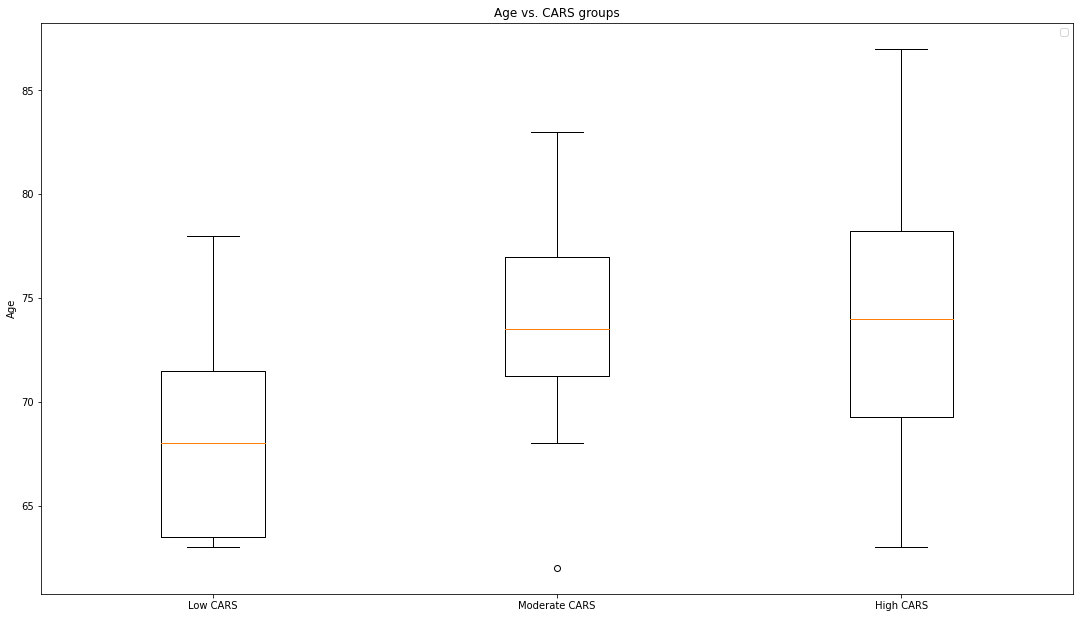

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.boxplot([df_low['Age'], df_moderate['Age'], df_high['Age']])
ax.legend()
ax.set_xticklabels(['Low CARS', 'Moderate CARS', 'High CARS']) 
plt.ylabel('Age')
plt.title('Age vs. CARS groups')
plt.show()

No handles with labels found to put in legend.


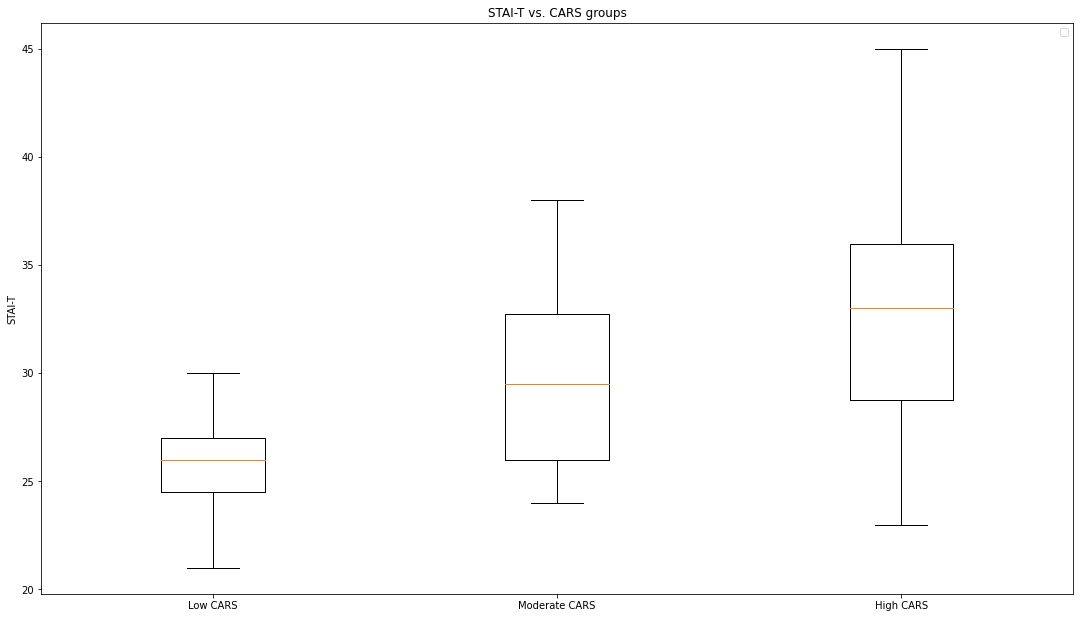

In [21]:
k = 'STAI-T'
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.boxplot([df_low[k], df_moderate[k], df_high[k]])
ax.legend()
ax.set_xticklabels(['Low CARS', 'Moderate CARS', 'High CARS']) 
plt.ylabel(k)
plt.title( k + ' vs. CARS groups')
plt.show()

No handles with labels found to put in legend.


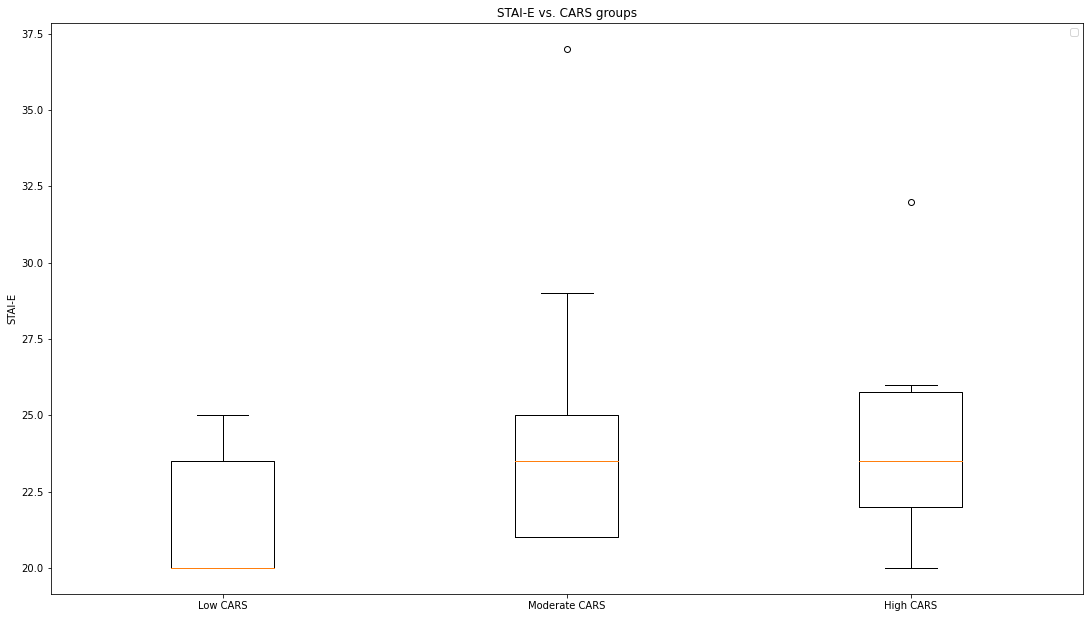

In [22]:
k = 'STAI-E'
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.boxplot([df_low[k], df_moderate[k], df_high[k]])
ax.legend()
ax.set_xticklabels(['Low CARS', 'Moderate CARS', 'High CARS']) 
plt.ylabel(k)
plt.title( k + ' vs. CARS groups')
plt.show()

In [23]:
swtest, p_stai_t = shapiro( df[ 'STAI-T' ] )
swtest, p_stai_e = shapiro( df[ 'STAI-E' ] )

print( 'Shapiro-Wilk (STAI-T) p-value: {:.5f}'.format( p_stai_t ) ) 
print( 'Shapiro-Wilk (STAI-E) p-value: {:.5f}'.format( p_stai_e ) ) 

Shapiro-Wilk (STAI-T) p-value: 0.12382
Shapiro-Wilk (STAI-E) p-value: 0.00014


In [24]:
k = 'STAI-T'
utest, p_lm = mannwhitneyu( df_low[ k ], df_moderate[ k ] )
utest, p_lh = mannwhitneyu( df_low[ k ], df_high[ k ] )
utest, p_mh = mannwhitneyu( df_moderate[ k ], df_high[ k ] )

print( 'Low CARS vs. Moderate CARS p-value {:.5f}'.format( p_lm ) ) 
print( 'Low CARS vs. High CARS p-value {:.5f}'.format( p_lh ) ) 
print( 'Moderate CARS vs. High CARS p-value {:.5f}'.format( p_mh ) ) 

Low CARS vs. Moderate CARS p-value 0.03561
Low CARS vs. High CARS p-value 0.00534
Moderate CARS vs. High CARS p-value 0.10856


In [25]:
k = 'STAI-E'
utest, p_lm = mannwhitneyu( df_low[ k ], df_moderate[ k ] )
utest, p_lh = mannwhitneyu( df_low[ k ], df_high[ k ] )
utest, p_mh = mannwhitneyu( df_moderate[ k ], df_high[ k ] )

print( 'Low CARS vs. Moderate CARS p-value {:.5f}'.format( p_lm ) ) 
print( 'Low CARS vs. High CARS p-value {:.5f}'.format( p_lh ) ) 
print( 'Moderate CARS vs. High CARS p-value {:.5f}'.format( p_mh ) ) 

Low CARS vs. Moderate CARS p-value 0.02931
Low CARS vs. High CARS p-value 0.05054
Moderate CARS vs. High CARS p-value 0.44096


# Building a classifier after resampling CARS groups

In [26]:
# Task Time(sec)
# Clicks Number
# DB Clicks Number
# MEAN CLICK DURATION (sec)
# TYPING VELOCITY (key/min)
# TOTAL TIME TYPING (sec)

X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CLASS']

In [27]:
X

,Task Time(sec),Clicks Number,DB Clicks Number,MEAN CLICK DURATION (sec),TYPING VELOCITY (key/min),TOTAL TIME TYPING (sec)
0,257,9,0,0.464,15.540,7.722
1,305,6,0,1.816,0.000,0.000
2,333,10,0,0.282,44.349,19.198
3,335,13,0,0.218,32.318,63.122
4,373,14,0,2.398,49.307,9.220
5,441,20,2,0.158,0.000,0.000
6,464,8,0,0.331,0.000,0.000
7,510,21,0,0.685,158.845,4.155
8,518,8,0,0.344,0.000,0.000
9,522,14,1,0.185,43.775,73.640


In [28]:
y

0     High
1     High
2       No
3     High
4      Low
5      Low
6      Low
7      Low
8     High
9       No
10    High
11      No
12     Low
13      No
14    High
15     Low
16     Low
17    High
18     Low
19     Low
20     Low
21    High
22     Low
23      No
24     Low
25      No
26    High
27    High
28      No
29    High
30     Low
Name: CLASS, dtype: object

In [29]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print ( len( y_over ) )
X_over, y_over = oversample.fit_resample(X_over, y_over)
print ( len( y_over ) )

37
39


In [30]:
y_over

0     High
1     High
2       No
3     High
4      Low
5      Low
6      Low
7      Low
8     High
9       No
10    High
11      No
12     Low
13      No
14    High
15     Low
16     Low
17    High
18     Low
19     Low
20     Low
21    High
22     Low
23      No
24     Low
25      No
26    High
27    High
28      No
29    High
30     Low
31      No
32      No
33      No
34      No
35      No
36      No
37    High
38    High
Name: CLASS, dtype: object

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.3, random_state = 0)

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train_over, y_train_over)

c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_over = classifier.predict(X_test_over)

In [34]:
y_test_over == y_pred_over

4     False
28    False
29    False
33     True
34     True
25     True
10     True
22    False
11    False
27     True
18     True
15     True
Name: CLASS, dtype: bool

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
cm

array([[2, 0, 1],
       [1, 2, 1],
       [1, 1, 3]], dtype=int64)

In [36]:
accuracies = cross_val_score(estimator = classifier, X = X_train_over, y = y_train_over, cv = 3)
print( accuracies.mean() )
print( accuracies.std() )

c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5185185185185185
0.1385799032138497


c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Building a regressor for CARS values


In [37]:
# Importing the dataset

# Columns
# Age
# Education Levels (years)
# Minimental
# GDS
# CSE
# STAI-T
# STAI-E
# SUS
# Minimental - Result
# GDS - Result
# Aproved
# Task Completion
# Task End
# Task Time(sec)
# Events Number
# Nodes Number
# Eccentricity
# Incidentes Number
# Mean Degree
# MOUSE DOWN-UP
# Clicks Number
# DB Clicks Number
# MEAN CLICK DURATION (sec)
# MEAN PAUSE BEFORE CLICK (sec)
# MOUSE TOTAL DISTANCE (px)
# MOUSE MEAN DISTANCE (px)
# MOUSE MEAN VELOCITY (px/sec)
# MEAN STROKE LENGTH (px)
# MEAN STROKE DURATION (sec)
# MEAN STRAIGHTNESS
# KEYS
# TYPING VELOCITY (key/min)
# TOTAL TIME TYPING (sec)
# MEAN TIME TYPING (sec)
# DELETE
# BACKSPACE
# DELETE + BACKSPACE
# Gaze Total Distance (px)
# Gaze Mean Distance (px)
# Gaze Total Time (sec)
# Gaze Velocity (px/s)
# Mean Pupil Size (norm)
# Pupil standard deviation (norm)
# High Three Sigma
# Low three sigma
# High Outliers
# Low Outliers
# CARS


# X = df.iloc[:, 1:47]
# X = X.drop( columns = ['Minimental - Result', 'GDS - Result', 'Aproved', 'Task Completion', 'Task End'] )

# X = df.iloc[:, 1:9]
# X = df.iloc[:, 21:25]
X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CARS']


In [38]:
X

,Task Time(sec),Clicks Number,DB Clicks Number,MEAN CLICK DURATION (sec),TYPING VELOCITY (key/min),TOTAL TIME TYPING (sec)
0,257,9,0,0.464,15.540,7.722
1,305,6,0,1.816,0.000,0.000
2,333,10,0,0.282,44.349,19.198
3,335,13,0,0.218,32.318,63.122
4,373,14,0,2.398,49.307,9.220
5,441,20,2,0.158,0.000,0.000
6,464,8,0,0.331,0.000,0.000
7,510,21,0,0.685,158.845,4.155
8,518,8,0,0.344,0.000,0.000
9,522,14,1,0.185,43.775,73.640


In [39]:
# Feature Scaling
sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

X = sc.fit_transform(X)

In [40]:
X

array([[-1.18325075, -0.89851247, -0.37603493,  0.02130368, -0.38447395,
        -0.2323979 ],
       [-1.10904198, -1.02032247, -0.37603493,  2.89230012, -0.50922691,
        -0.26348211],
       [-1.06575354, -0.85790913, -0.37603493, -0.36517661, -0.1531993 ,
        -0.18620231],
       [-1.06266151, -0.73609914, -0.37603493, -0.50108177, -0.2497825 ,
        -0.00939024],
       [-1.0039129 , -0.6954958 , -0.37603493,  4.12818764, -0.11339716,
        -0.22636784],
       [-0.89878382, -0.4518758 ,  0.23749575, -0.62849285, -0.50922691,
        -0.26348211],
       [-0.86322546, -0.9391158 , -0.37603493, -0.26112422, -0.50922691,
        -0.26348211],
       [-0.79210872, -0.41127247, -0.37603493,  0.49060118,  0.76595868,
        -0.24675654],
       [-0.7797406 , -0.9391158 , -0.37603493, -0.23351849, -0.50922691,
        -0.26348211],
       [-0.77355653, -0.6954958 , -0.06926959, -0.57115786, -0.15780729,
         0.03294901],
       [-0.68388761, -0.85790913, -0.37603493, -0.

In [42]:
# Finding good n_estimators
from sklearn.ensemble import RandomForestRegressor
i = 10
mse = 100**100
n_estimators = i
r2 = 0.0
while i < 10000:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    print( 'R2: ' + str( r2_score(y, y_pred ) ) + '\tn_estimators = ' + str( i ) + '\tMSE = ' + str( mean_squared_error(y, y_pred) ) )
    if( mean_squared_error(y, y_pred) < mse ):
        mse = mean_squared_error(y, y_pred)
        n_estimators = i
        r2 = r2_score( y, y_pred )
    i = i * 2
    
print( '--> Best n_estimators=' + str( n_estimators ) + ' with MSE=' + str( mse ) + ' and R2=' + str( r2 ) ) 

R2: 0.808676637286881	n_estimators = 10	MSE = 17.211935483870963
R2: 0.7958827815948366	n_estimators = 20	MSE = 18.36290322580645
R2: 0.8004973815555092	n_estimators = 40	MSE = 17.9477620967742
R2: 0.8002189278402387	n_estimators = 80	MSE = 17.9728125
R2: 0.8222277526198902	n_estimators = 160	MSE = 15.992842741935487
R2: 0.824910390840071	n_estimators = 320	MSE = 15.751505796370969
R2: 0.8223199072481373	n_estimators = 640	MSE = 15.98455227759577
R2: 0.8191460853146186	n_estimators = 1280	MSE = 16.270077357138355
R2: 0.817923270986289	n_estimators = 2560	MSE = 16.380084838867187
R2: 0.8136884540619899	n_estimators = 5120	MSE = 16.761059721669852
--> Best n_estimators=320 with MSE=15.751505796370969 and R2=0.824910390840071


In [43]:
regressor = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=320, random_state=0)

In [44]:
y_pred = regressor.predict(X)
y - y_pred

0     0.187500
1     3.487500
2    -4.493750
3     4.984375
4     3.218750
5     0.321875
6    -1.606250
7     1.559375
8     5.500000
9    -5.440625
10    1.481250
11   -4.046875
12   -4.415625
13   -2.953125
14    1.303125
15    2.018750
16    1.378125
17    2.946875
18   -2.596875
19    2.340625
20   -0.568750
21    4.662500
22    4.159375
23   -6.406250
24    0.606250
25   -6.750000
26    7.262500
27    3.221875
28   -6.546875
29    3.443750
30    6.015625
Name: CARS, dtype: float64

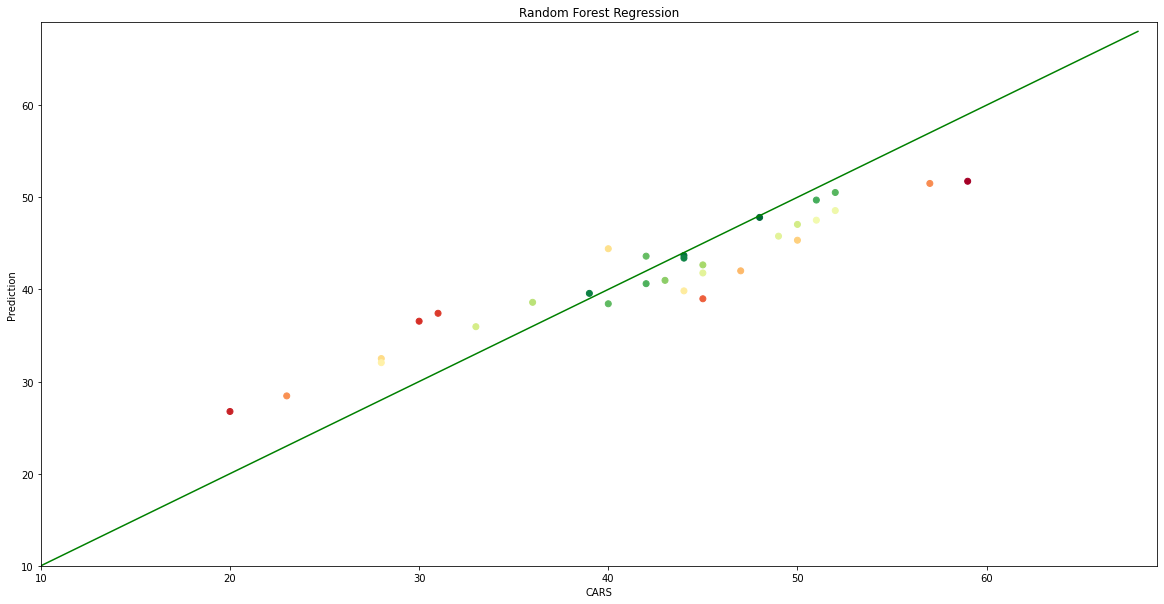

In [377]:
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y ), min( y_pred ) ) - padding
max_y = max( max( y ), max( y_pred ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
plt.scatter( y, regressor.predict(X), c = abs( y_pred - y ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Random Forest Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

# Buliding a regressor after over resampling

In [45]:
# Task Time(sec)
# Clicks Number
# DB Clicks Number
# MEAN CLICK DURATION (sec)
# TYPING VELOCITY (key/min)
# TOTAL TIME TYPING (sec)

X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CARS']

(array([2., 0., 4., 1., 2., 5., 7., 6., 2., 2.]),
 array([20. , 23.9, 27.8, 31.7, 35.6, 39.5, 43.4, 47.3, 51.2, 55.1, 59. ]),
 <BarContainer object of 10 artists>)

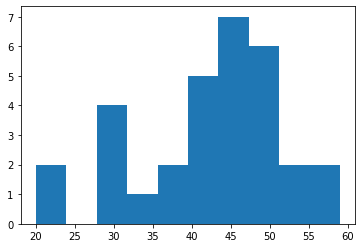

In [46]:
plt.hist( y )

In [47]:
print( len( y ) )

31


In [48]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
size = len( y_over )
prev_size = 0
while size > prev_size:
    prev_size = size 
    X_over, y_over = oversample.fit_resample(X_over, y_over) # must be only resample after previous fit
    size = len( y_over )
    print( size )

35
37
39
41
43
45
47
49
51
53
55
57
58
59
60
61
62
63
63


(array([ 6.,  0.,  9.,  3.,  6.,  9.,  9., 12.,  3.,  6.]),
 array([20. , 23.9, 27.8, 31.7, 35.6, 39.5, 43.4, 47.3, 51.2, 55.1, 59. ]),
 <BarContainer object of 10 artists>)

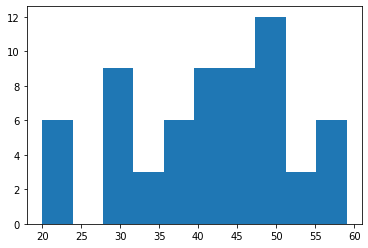

In [49]:
plt.hist( y_over )

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

In [51]:
# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform( X_train_over )
X_test = sc.transform( X_test_over )

In [53]:
# Finding good n_estimators
from sklearn.ensemble import RandomForestRegressor
i = 10
mse = 100**100
n_estimators = i
r2 = 0.0
while i < 10000:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(X_train_over, y_train_over)
    y_pred = regressor.predict(X_test_over)
    print( 'R2: ' + str( r2_score(y_test_over, y_pred ) ) + '\tn_estimators = ' + str( i ) + '\tMSE = ' + str( mean_squared_error(y_test_over, y_pred) ) )
    if( mean_squared_error(y_test_over, y_pred) < mse ):
        mse = mean_squared_error(y_test_over, y_pred)
        n_estimators = i
        r2 = r2_score( y_test_over, y_pred )
    i = i * 2
    
print( '--> Best n_estimators=' + str( n_estimators ) + ' with MSE=' + str( mse ) + ' and R2=' + str( r2 ) ) 

R2: 0.8469496778403066	n_estimators = 10	MSE = 22.207692307692312
R2: 0.806125214093467	n_estimators = 20	MSE = 28.131346153846152
R2: 0.7994945355191256	n_estimators = 40	MSE = 29.09346153846154
R2: 0.829564772194356	n_estimators = 80	MSE = 24.73025240384616
R2: 0.8173405147036334	n_estimators = 160	MSE = 26.503999399038467
R2: 0.8263849852141699	n_estimators = 320	MSE = 25.19164137620192
R2: 0.8216903081448547	n_estimators = 640	MSE = 25.872841796874994
R2: 0.8134279435253213	n_estimators = 1280	MSE = 27.07171579214242
R2: 0.8120585692557919	n_estimators = 2560	MSE = 27.270412808931777
R2: 0.8103052347035599	n_estimators = 5120	MSE = 27.52482268993671
--> Best n_estimators=10 with MSE=22.207692307692312 and R2=0.8469496778403066


In [54]:
#regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
#print('i = ' + str(i) + 'best i '+ str( n_estimators ) )
regressor = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
regressor.fit(X_train_over, y_train_over)
y_pred = regressor.predict(X_test_over)

In [55]:
abs( y_test_over - y_pred )

43     0.0
49     1.0
62     0.4
51     0.0
32     0.3
34     5.8
29     6.4
46     0.0
11     7.3
2     11.7
26     0.9
60     3.5
4      3.1
Name: CARS, dtype: float64

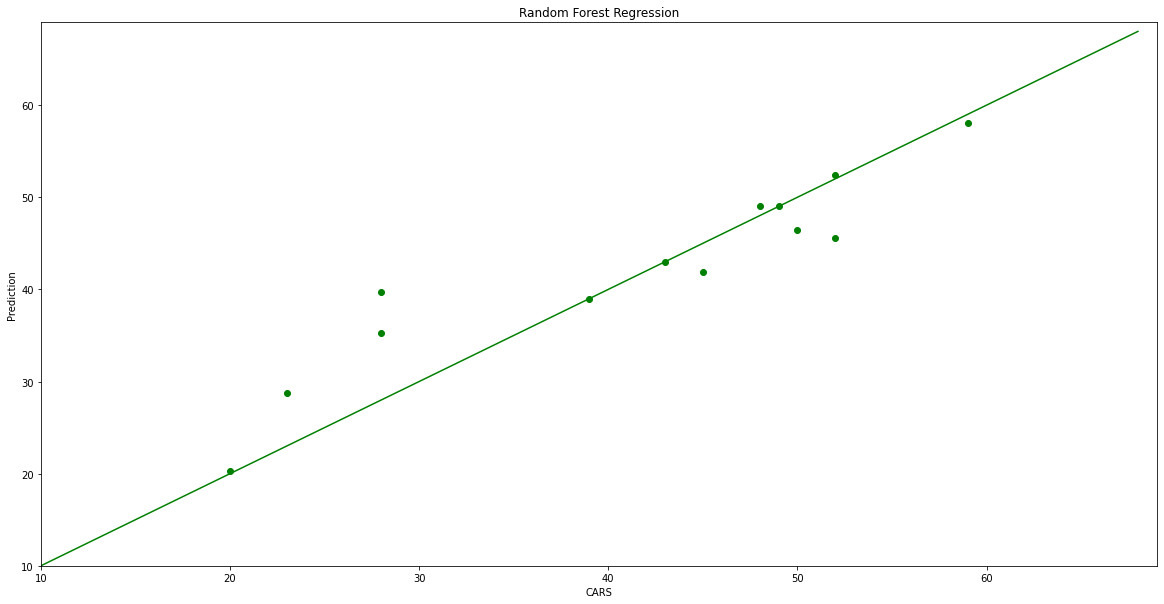

In [58]:
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y_test_over ), min( y_pred ) ) - padding
max_y = max( max( y_test_over ), max( y_pred ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
# plt.scatter( y_test_over, regressor.predict(X_test_over), c = abs( y_pred - y_test_over ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.scatter( y_test_over, regressor.predict(X_test_over), c = 'green')
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Random Forest Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

# Building a Decision Tree

In [433]:
X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CLASS']

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
size = len( y_over )
prev_size = 0
while size > prev_size:
    prev_size = size 
    X_over, y_over = oversample.fit_resample(X_over, y_over) # must be only resample after previous fit
    size = len( y_over )
    print( size )
    
    
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform( X_train_over )
X_test = sc.transform( X_test_over )

39
39


In [436]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_over, y_train_over)




#y_pred2 = dtree.predict(X_test_over)
#dtree.score(y_pred2, y_pred2)
score1 = dtree.score(X_test_over, y_test_over)
score2 = dtree.score(X_train_over, y_train_over)
score3 = dtree.score(X, y)

print("Score 1 ", score1)
print("Score 2 ", score2)
print("Score 3 ", score3)


#new_series = pd.Series(y_pred2)
#print(new_series)


#abs( y_test_over - y_pred2 )



Score 1  0.5
Score 2  1.0
Score 3  0.8709677419354839


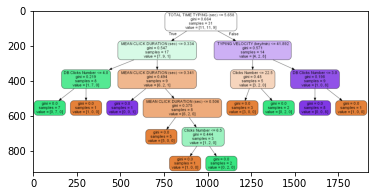

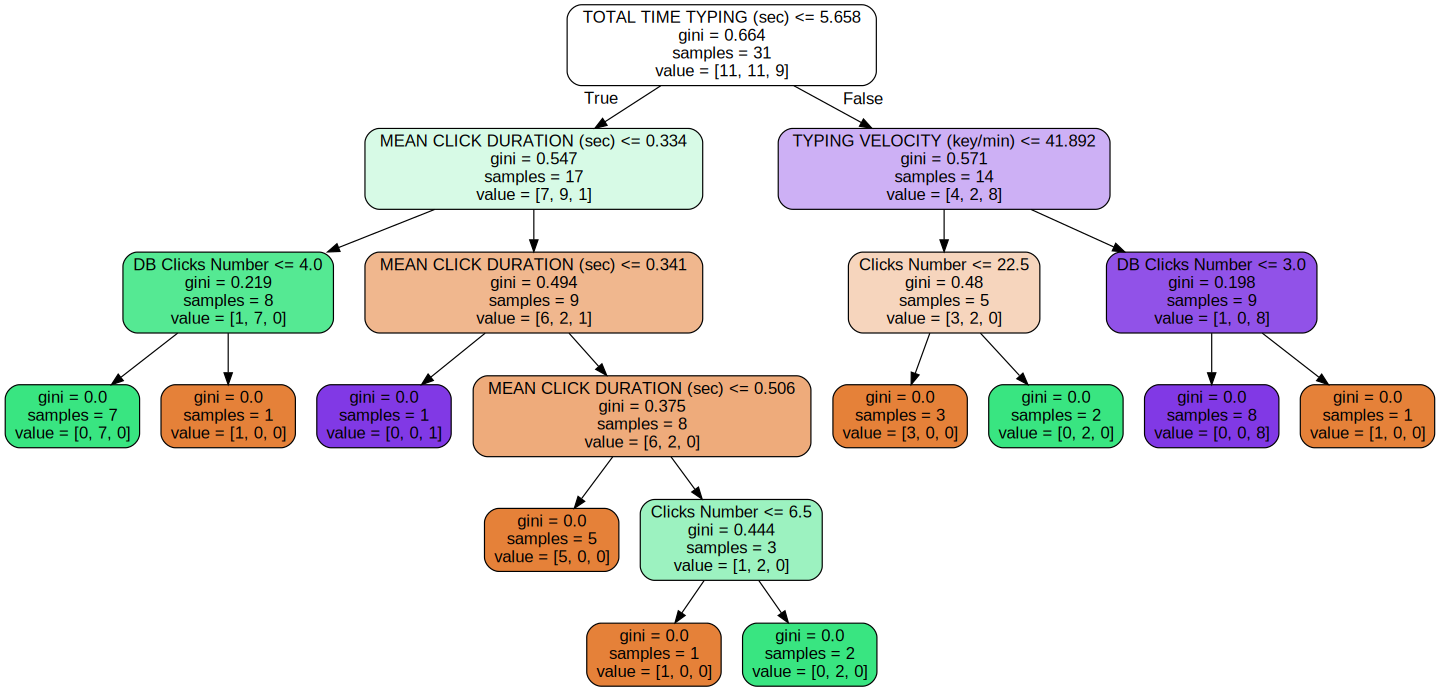

In [437]:
col_names = X.columns

data = tree.export_graphviz(dtree, out_file=None, feature_names=col_names,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(data)
graph.set_size('"20,20!"')
graph.write_png('decisionTree.png')

graph.write_png('resized_tree.png')



img=pltimg.imread('resized_tree.png')
imgplot = plt.imshow(img)
plt.show()

import graphviz
gvz_graph = graphviz.Source(graph.to_string())
gvz_graph

In [438]:
yp = dtree.predict(X_test_over)
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y_test_over ), min( yp ) ) - padding
max_y = max( max( y_test_over ), max( yp ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
# plt.scatter( y_test_over, regressor.predict(X_test_over), c = abs( y_pred - y_test_over ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.scatter( y_test_over, lreg.predict(X_test_over), c = 'green')
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Linear Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

# Building a Linear Regression

In [439]:
# Create the linear regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#regressor.fit(X_train_over, y_train_over)
#y_pred = regressor.predict(X_test_over)

#print(X_test_over)
#print(y_test_over)

lreg = LinearRegression()
lreg.fit(X_train_over, y_train_over) 


##########


# Make predictions using the testing set
y_pred = lreg.predict(X_test_over)
#print("yy ", len(y_pred))
#print("xx ", len(X_test_over))


# The coefficients
print('Coefficients: \n', lreg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_over, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_over, y_pred))


scor = lreg.score(X_train_over, y_train_over)
print("score ", scor)
#yp = lreg.predict(X_test_over)
#print("yp ",yp )


#abs( y_test_over - yp )


ValueError: could not convert string to float: 'No'

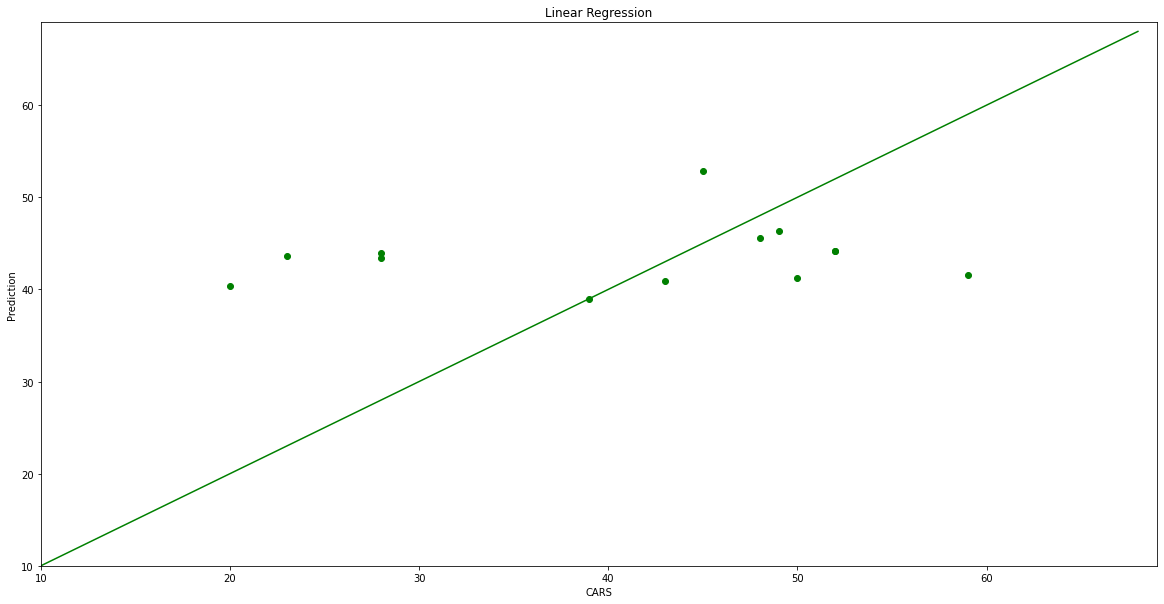

In [418]:
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y_test_over ), min( yp ) ) - padding
max_y = max( max( y_test_over ), max( yp ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
# plt.scatter( y_test_over, regressor.predict(X_test_over), c = abs( y_pred - y_test_over ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.scatter( y_test_over, lreg.predict(X_test_over), c = 'green')
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Linear Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

   # Tree Classifier

In [445]:
from sklearn import metrics 
print(X)
print(y)
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train_over, y_train_over) 


test_pred_decision_tree = clf.predict(X_test_over)
metrics.accuracy_score(y_test_over, test_pred_decision_tree)

#y_pred = clf.predict(X_test_over)
#abs( y_test_over - yp )

    Task Time(sec)  Clicks Number  DB Clicks Number  \
0              257              9                 0   
1              305              6                 0   
2              333             10                 0   
3              335             13                 0   
4              373             14                 0   
5              441             20                 2   
6              464              8                 0   
7              510             21                 0   
8              518              8                 0   
9              522             14                 1   
10             580             10                 0   
11             693             25                 0   
12             709              7                 0   
13             724             21                 0   
14             752             49                 0   
15             779             25                 0   
16             918             37                 0   
17        

0.5

In [448]:
from sklearn.ensemble import RandomForestClassifier
#print(X)
#print(y)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_over, y_train_over) 


test_pred_decision_tree = clf.predict(X_test_over)
metrics.accuracy_score(y_test_over, test_pred_decision_tree)

#y_pred = clf.predict(X_test_over)
#abs( y_test_over - yp )

0.625